In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

import scipy
import pywt
import mne
import math

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
from stats_utils import *
import glob
import os


import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
task = 'motor'
freqband_low = 6
freqband_high = 10

wavelet_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_{task}__n05to05_30Hz_all_ave'
subjects_to_process = find_existing_subjects(wavelet_dir)
print('processing subjects', subjects_to_process)
wavelet_trans_info = loadmat(os.path.join(wavelet_dir,f'wavelet_record.mat'))

times = wavelet_trans_info['times'].squeeze()
freqs = wavelet_trans_info['freqs'].squeeze()



processing subjects ['01', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20']


In [25]:
topo_freqband_pre = power_over_channels(subjects_to_process, wavelet_dir, [freqband_low,freqband_high], period = 'pre')
topo_freqband_post = power_over_channels(subjects_to_process, wavelet_dir, [freqband_low, freqband_high], period = 'post')

skipping sub record
skipping sub record


In [26]:

diff_topo = topo_freqband_post - topo_freqband_pre
diff_topo_ave = diff_topo.mean(axis = 0)

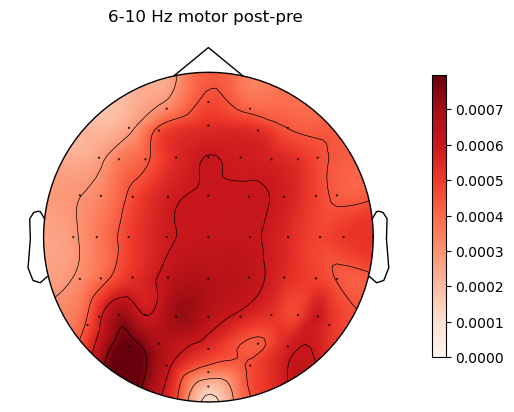

In [27]:

pos = load_ep_info()
plot_topo_custom(diff_topo_ave, pos, colorbar=True, title = f'{freqband_low}-{freqband_high} Hz {task} post-pre ')


Stats over channels

In [28]:
t_stats, p_values = t_within_points(diff_topo)

testing gaussianity over 18 points
Distribution is not normal. p =  0.00011098735139519601
using wilcoxon test
fdr correction over all p values


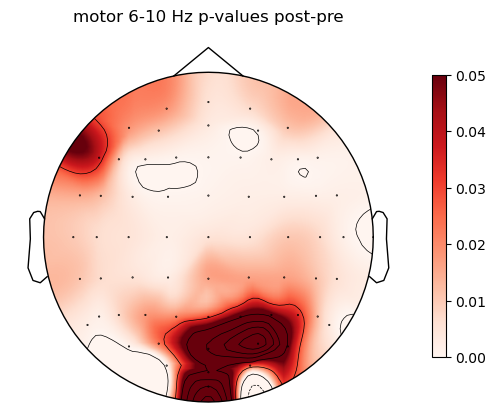

In [29]:
plot_topo_custom(p_values, pos, 
                 title = f'{task} {freqband_low}-{freqband_high} Hz p-values post-pre', 
                 colorbar = True,
                 vlim = (0,0.05))

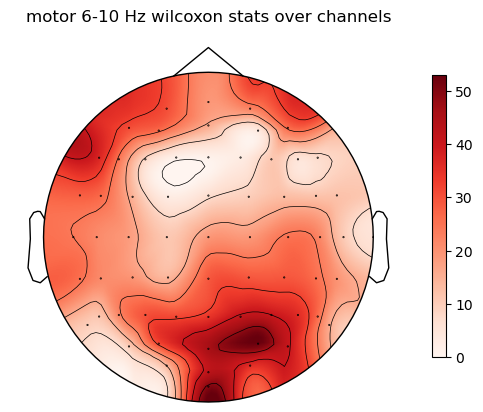

In [30]:
plot_topo_custom(t_stats, pos, 
                 title = f'{task} {freqband_low}-{freqband_high} Hz wilcoxon stats over channels', 
                 colorbar = True,
                 )